# Gauge Visual for Numeric Data

In [16]:
%matplotlib inline

[8, 0, 15, 3, 5, 7.5, 9]


<function matplotlib.pyplot.show(close=None, block=None)>

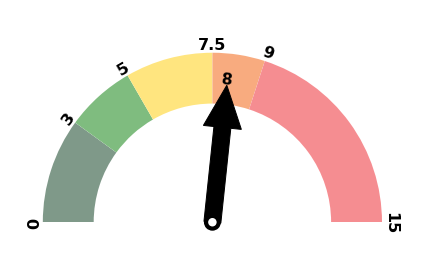

In [31]:
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Wedge, Rectangle
import pandas as pd

dataset = {
    'Value': [8]
    , 'Min': [0]
    , 'Max': [15]
    , 'L1': [3]
    , 'L2': [5]
    , 'L3': [7.5]
    , 'L4': [9]#[np.nan]
}
dataset = pd.DataFrame(dataset)

datalist = dataset.values.tolist()[0]
for key, val in enumerate(datalist):
    if type(val) == float:
        if val.is_integer():
            datalist[key] = int(val)
print(datalist)

g_val = datalist[0]
g_min = datalist[1]
g_max = datalist[2]
g_l = [x for x in datalist[3:] if np.isnan(x) == False]

gauge(labels= g_l, cval= g_val, cmin= g_min, cmax= g_max)
plt.show

In [18]:
def angle_conversion(orig_val, orig_min, orig_max):
    val = (orig_val - orig_min) / (orig_max - orig_min) * 180
    val = abs(val-180)
    return val


def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation


def gauge(labels=[2,5,7], cval=8.5, cmin=0, cmax=12, title=''
    , fname=False, label_r = .42, arc_r = .4, arc_w = .12):
    """
    Plot a gauge KPI visual given interval data 
    """

    label_offset = .02
    pos = angle_conversion(cval, cmin, cmax)
    N = len(labels)+2

    """
    Color Assignment
    """
    colors = {
        2: ['#003415','#ED1C24']
        , 3: ['#003415','#FFCC00','#ED1C24']
        , 4: ['#003415', '#007A00','#FFCC00','#ED1C24']
        , 5: ['#003415', '#007A00', '#FFCC00','#F25900','#ED1C24']
    }
    colors = colors[len(labels)+1]

    """
    Begin Plotting
    """
    fig, ax = plt.subplots()

    mid_points = []
    for x in labels:
        mid_points.append(angle_conversion(x, cmin, cmax))

    start = []
    end = []
    for i, val in enumerate(mid_points):
        if i == 0:
            end.append(180)
            start.append(val)
        else:
            end.append(mid_points[i-1]) 
            start.append(val)
    end.append(mid_points[i])
    start.append(0)

    ang_range = np.c_[start, end]

    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # Sector Arcs
        patches.append(Wedge((0.,0.), label_r+label_offset, *ang, facecolor='w'))
        # Inner White Area
        patches.append(Wedge((0.,0.), arc_r, *ang, width=arc_w, facecolor=c, alpha=0.5))

    [ax.add_patch(p) for p in patches]


    """
    Set the interval labels
    """
    points = [180, *mid_points, 0]
    labels = [cmin, *labels, cmax]
    for point, lab in zip(points, labels): 

        ax.text(label_r * np.cos(np.radians(point)), label_r * np.sin(np.radians(point)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=16, \
            fontweight='bold', rotation = rot_text(point))

    ax.text((arc_r-arc_w/2) * np.cos(np.radians(pos)), 
        (arc_r-arc_w/2) * np.sin(np.radians(pos)), cval,
        horizontalalignment='center', verticalalignment='center', fontsize=16,
        fontweight='bold', rotation = rot_text(pos))

    """
    Set the bottom banner and title
    """
    r = Rectangle((-label_r-label_offset,-0.05),2*(label_r+label_offset),0.05, facecolor='w', lw=2)
    ax.add_patch(r)

    ax.text(0, -0.05, title, horizontalalignment='center', \
            verticalalignment='center', fontsize=22, fontweight='bold')

    """
    Plot the arrow
    """
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                    width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')

    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()